In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('mode.chained_assignment', None)

In [2]:



file_path = 'C:\\Users\\LAP ME\\Desktop\\داتا ساينس دبلومه\\projects\\card12 data\\Shiftdata_20241225.txt'


with open(file_path, 'r') as file:
    lines = file.readlines()


for line in lines[:]:
    print(line)


=== Shiftdata_20241225.txt            (25.12.2024 14:37:49) ===

=== 409-71.801.190ax                  (21.06.2024 09:44:00) ===

=== Serial No. 103298 F                                     ===




Start date/time | Duration 	| Production 		| Efficiency 	| Manual Stop 		| Error Stop 		| Service Stop		|

----------------------------------------------------------------------------------------------------------------------------------------------------------

25.12.  08:00	|	06:37	|	   486 kg	|	 83%	|	 1 - 00:03	|	 3 - 00:45	|	 1 - 00:16	|

25.12.  00:00	|	08:00	|	   670 kg	|	 99%	|	 1 - 00:00	|	 3 - 00:03	|	 0 - 00:00	|

24.12.  16:00	|	08:00	|	   639 kg	|	 96%	|	 1 - 00:02	|	 4 - 00:16	|	 0 - 00:00	|

24.12.  08:00	|	08:00	|	   539 kg	|	 81%	|	 1 - 00:00	|	18 - 01:17	|	 1 - 00:11	|

24.12.  00:00	|	08:00	|	   559 kg	|	 83%	|	 0 - 00:00	|	17 - 01:16	|	 0 - 00:00	|

23.12.  16:00	|	08:00	|	   548 kg	|	 82%	|	 3 - 00:30	|	18 - 00:45	|	 1 - 00:07	|

23.12.  08:00	|	08:00	|	   470 kg	|	 71%

In [9]:



# تحديد مسار الملف
file_path = r'C:\\Users\\LAP ME\\Desktop\\داتا ساينس دبلومه\\projects\\card12 data\\Shiftdata_20241225.txt'

# قراءة الملف النصي
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# تحديد الأعمدة
columns = [
    "Start date/time", "Duration", "Production", "Efficiency", 
    "Manual Stop", "Error Stop", "Service Stop", "Extra Column"  # إضافة عمود إضافي إذا لزم الأمر
]

# استخراج البيانات بدءًا من السطر 9 (حيث تبدأ البيانات)
data = []
for line in lines[9:]:
    if line.strip() and "|" in line:  # تجاهل السطور الفارغة والخطوط بدون بيانات
        split_line = line.split("|")
        data.append([item.strip() for item in split_line])

# طباعة أول صف لفحص الأعمدة
print(data[0])

# تحويل البيانات إلى DataFrame
df = pd.DataFrame(data, columns=columns[:len(data[0])])  # استخدام الأعمدة المناسبة فقط

# تنظيف الأعمدة
df["Production"] = df["Production"].str.replace("kg", "").astype(int)
df["Efficiency"] = df["Efficiency"].str.replace("%", "").astype(int)

# تقسيم أعمدة التوقفات إلى عدد ومدة
for stop_type in ["Manual Stop", "Error Stop", "Service Stop"]:
    df[[f"{stop_type} Count", f"{stop_type} Duration"]] = df[stop_type].str.split("-", expand=True)
    df[f"{stop_type} Count"] = df[f"{stop_type} Count"].astype(int)
    df[f"{stop_type} Duration"] = df[f"{stop_type} Duration"].str.strip()

# حذف الأعمدة الأصلية للتوقفات
df.drop(columns=["Manual Stop", "Error Stop", "Service Stop"], inplace=True)

# حفظ البيانات في ملف Excel
output_path = r'C:\Users\LAP ME\Desktop\داتا ساينس دبلومه\projects\shift_data_cleaned.xlsx'
df.to_excel(output_path, index=False)

# عرض رسالة نجاح
print(f"تم حفظ البيانات إلى {output_path}")

# عرض البيانات لمعرفة شكلها النهائي
print(df)



['25.12.  00:00', '08:00', '670 kg', '99%', '1 - 00:00', '3 - 00:03', '0 - 00:00', '']
تم حفظ البيانات إلى C:\Users\LAP ME\Desktop\داتا ساينس دبلومه\projects\shift_data_cleaned.xlsx
   Start date/time Duration  Production  Efficiency Extra Column  \
0    25.12.  00:00    08:00         670          99                
1    24.12.  16:00    08:00         639          96                
2    24.12.  08:00    08:00         539          81                
3    24.12.  00:00    08:00         559          83                
4    23.12.  16:00    08:00         548          82                
5    23.12.  08:00    08:00         470          71                
6    23.12.  00:00    08:00         623          92                
7    22.12.  16:00    08:00         652          96                
8    22.12.  08:00    08:00         601          89                
9    22.12.  00:00    08:00         507          77                
10   21.12.  16:00    08:00         438          70                
11

In [11]:
cp=pd.read_excel('C:\\Users\\LAP ME\\Desktop\\داتا ساينس دبلومه\\projects\\shift_data_cleaned.xlsx')
cp


,Start date/time,Duration,Production,Efficiency,Extra Column,Manual Stop Count,Manual Stop Duration,Error Stop Count,Error Stop Duration,Service Stop Count,Service Stop Duration
0,25.12. 00:00,08:00,670,99,NaN,1,00:00,3,00:03,0,00:00
1,24.12. 16:00,08:00,639,96,NaN,1,00:02,4,00:16,0,00:00
2,24.12. 08:00,08:00,539,81,NaN,1,00:00,18,01:17,1,00:11
3,24.12. 00:00,08:00,559,83,NaN,0,00:00,17,01:16,0,00:00
4,23.12. 16:00,08:00,548,82,NaN,3,00:30,18,00:45,1,00:07
5,23.12. 08:00,08:00,470,71,NaN,2,00:10,30,01:40,2,00:24
6,23.12. 00:00,08:00,623,92,NaN,2,00:13,7,00:21,0,00:00
7,22.12. 16:00,08:00,652,96,NaN,1,00:00,4,00:15,0,00:00
8,22.12. 08:00,08:00,601,89,NaN,1,00:11,7,00:21,1,00:16
9,22.12. 00:00,08:00,507,77,NaN,3,00:58,11,00:47,0,00:00


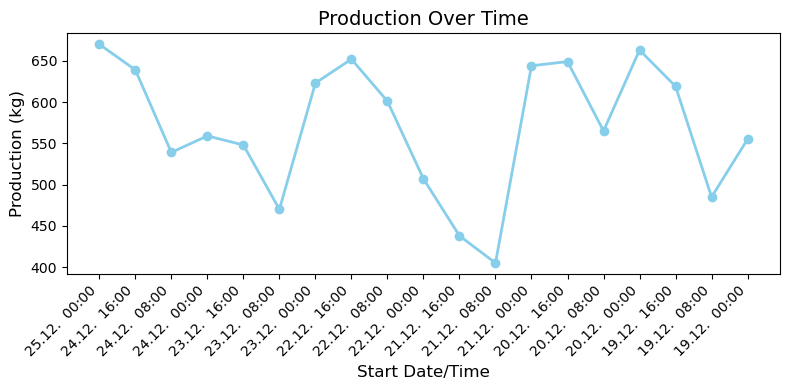

In [13]:
import matplotlib.pyplot as plt

# التأكد من تحويل العمودين للصيغ الصحيحة




# عرض البيانات بعد التعديل



# رسم المخطط الخطي
plt.figure(figsize=(8, 4))
plt.plot(cp['Start date/time'], cp['Production'], marker='o', color='skyblue', linestyle='-', linewidth=2)

# تخصيص المحور السيني بالقيم النصية للتواريخ
plt.xticks(rotation=45, ha='right')

# تخصيص المحاور والعنوان
plt.xlabel('Start Date/Time', fontsize=12)
plt.ylabel('Production (kg)', fontsize=12)
plt.title('Production Over Time', fontsize=14)

# تحسين عرض التواريخ على المحور السيني
plt.xticks(rotation=45, ha='right')

# عرض الرسم
plt.tight_layout()
plt.show()


In [14]:



file_path = "C:\\Users\\LAP ME\\Desktop\\داتا ساينس دبلومه\\projects\\card12 data\\Logbook_20241225.txt"  


with open(file_path, 'r') as file:
    lines = file.readlines()


data = []
for line in lines:
    
    if line.startswith("=") or line.strip() == "":
        continue
    
    parts = line.split("\t")
   
    while len(parts) < 4:
        parts.append("")
    data.append([part.strip() for part in parts])


df = pd.DataFrame(data, columns=["Date", "Time", "Event", "Details"])


output_excel_path = "organized_logbook.xlsx" 
df.to_excel(output_excel_path, index=False)

print(f"تم حفظ الملف بنجاح: {output_excel_path}")


تم حفظ الملف بنجاح: organized_logbook.xlsx


In [17]:
clp=pd.read_excel('C:\\Users\\LAP ME\\Desktop\\داتا ساينس دبلومه\\projects\\organized_logbook.xlsx')
clp


,Date,Time,Event,Details
0,23.12.2024,19:06:26,Starting speed,ON
1,23.12.2024,19:06:56,Automatic mode,NaN
2,23.12.2024,19:11:04,Thick spots,W0547
3,NaN,NaN,TrÃ¼tzschler Card,NaN
4,23.12.2024,19:11:11,Thick spots monitoring,E0431
...,...,...,...,...
687,25.12.2024,14:07:49,Close cover lock,T0707
688,NaN,NaN,Coiler,NaN
689,25.12.2024,14:10:29,Starting speed,ON
690,25.12.2024,14:11:16,Automatic mode,NaN


In [20]:
# إزالة الصفوف التي تحتوي على قيم فارغة في Date أو Time
clp = clp[(clp['Date'].str.strip() != '') & (clp['Time'].str.strip() != '')]

# إنشاء عمود DateTime
clp['DateTime'] = pd.to_datetime(clp['Date'] + ' ' + clp['Time'], format='%d.%m.%Y %H:%M:%S')
clp

,Date,Time,Event,Details,DateTime
0,23.12.2024,19:06:26,Starting speed,ON,2024-12-23 19:06:26
1,23.12.2024,19:06:56,Automatic mode,NaN,2024-12-23 19:06:56
2,23.12.2024,19:11:04,Thick spots,W0547,2024-12-23 19:11:04
3,NaN,NaN,TrÃ¼tzschler Card,NaN,NaT
4,23.12.2024,19:11:11,Thick spots monitoring,E0431,2024-12-23 19:11:11
...,...,...,...,...,...
687,25.12.2024,14:07:49,Close cover lock,T0707,2024-12-25 14:07:49
688,NaN,NaN,Coiler,NaN,NaT
689,25.12.2024,14:10:29,Starting speed,ON,2024-12-25 14:10:29
690,25.12.2024,14:11:16,Automatic mode,NaN,2024-12-25 14:11:16


In [23]:
clp

,Date,Time,Event,Details,DateTime
0,23.12.2024,19:06:26,Starting speed,ON,2024-12-23 19:06:26
1,23.12.2024,19:06:56,Automatic mode,NaN,2024-12-23 19:06:56
2,23.12.2024,19:11:04,Thick spots,W0547,2024-12-23 19:11:04
3,NaN,NaN,TrÃ¼tzschler Card,NaN,NaT
4,23.12.2024,19:11:11,Thick spots monitoring,E0431,2024-12-23 19:11:11
...,...,...,...,...,...
687,25.12.2024,14:07:49,Close cover lock,T0707,2024-12-25 14:07:49
688,NaN,NaN,Coiler,NaN,NaT
689,25.12.2024,14:10:29,Starting speed,ON,2024-12-25 14:10:29
690,25.12.2024,14:11:16,Automatic mode,NaN,2024-12-25 14:11:16


In [25]:
clp['Event'].unique(),clp['Event'].nunique()

(array(['Starting speed', 'Automatic mode', 'Thick spots',
        'TrÃ¼tzschler Card', 'Thick spots monitoring', 'DFK active',
        'DFK deactivated', 'DFK', 'WEBSPEED key switched on',
        'Code barred again', 'Can magazine is empty', 'Can changer',
        'Lap monitoring on delivery rollers', 'Coiler',
        'CV value monitoring', 'Login with code', 'Close cover lock',
        'Can filling', 'Draft deviation', 'Sliver signal, monitoring (+)',
        'Production adaption', 'T-GO synchronization', 'T-GO',
        'Machine stopped', 'Lock cylinder doors', 'Close right doors',
        'Check service switch', 'Service mode',
        'Safety circuit is interrupted', 'Cylinder',
        'CCD Regulation deactivated', 'ICFD Regulation deactivated',
        'CCD Regulation activated', 'Balance card',
        'ICFD Regulation activated', 'ICFD balancing value',
        'CCD balancing value', 'Flat strips suction monitoring',
        'Change of shift', 'Plant not ready for operation'

In [27]:
clp['DateTime'].max(),clp['DateTime'].min()

(Timestamp('2024-12-25 14:36:59'), Timestamp('2024-12-23 19:06:26'))

In [29]:
clp['Event'].value_counts()


Event
Starting speed                93
TrÃ¼tzschler Card             93
Automatic mode                64
Coiler                        42
Code barred again             30
                              ..
CCD Regulation activated       1
CCD Regulation deactivated     1
T-GO                           1
T-GO synchronization           1
Flat drive                     1
Name: count, Length: 63, dtype: int64

In [31]:
start_date = '2024-12-23 19:06:26'
end_date = '2024-12-25 14:36:59'
filtered_df = clp[(clp['DateTime'] >= start_date) & (clp['DateTime'] <= end_date) & (clp['Event'] == 'Sliver break')]
filtered_df

,Date,Time,Event,Details,DateTime
183,24.12.2024,03:24:46,Sliver break,E0141,2024-12-24 03:24:46
197,24.12.2024,04:39:53,Sliver break,E0141,2024-12-24 04:39:53
225,24.12.2024,06:05:37,Sliver break,E0141,2024-12-24 06:05:37
278,24.12.2024,08:50:35,Sliver break,E0141,2024-12-24 08:50:35
369,24.12.2024,11:10:34,Sliver break,E0141,2024-12-24 11:10:34
378,24.12.2024,11:19:01,Sliver break,E0141,2024-12-24 11:19:01
394,24.12.2024,11:23:56,Sliver break,E0141,2024-12-24 11:23:56
415,24.12.2024,11:59:44,Sliver break,E0141,2024-12-24 11:59:44
502,24.12.2024,17:49:04,Sliver break,E0141,2024-12-24 17:49:04
564,25.12.2024,03:04:24,Sliver break,E0141,2024-12-25 03:04:24


In [33]:
count=len(filtered_df)
count

11

In [35]:
start_date = '2024-12-23 19:06:26'
end_date = '2024-12-25 14:36:59'




unique_events = clp['Event'].unique()


for event in unique_events:
    
    filtered_df = clp[(clp['DateTime'] >= start_date) & (clp['DateTime'] <= end_date )& (clp['Event'] == event)]
    print(f"Date of Event: {event}")
    print(filtered_df)
    print('-' * 50)  


Date of Event: Starting speed
           Date      Time           Event Details            DateTime
0    23.12.2024  19:06:26  Starting speed      ON 2024-12-23 19:06:26
9    23.12.2024  19:13:19  Starting speed      ON 2024-12-23 19:13:19
13   23.12.2024  19:14:46  Starting speed      ON 2024-12-23 19:14:46
20   23.12.2024  19:54:37  Starting speed      ON 2024-12-23 19:54:37
23   23.12.2024  19:54:58  Starting speed      ON 2024-12-23 19:54:58
..          ...       ...             ...     ...                 ...
668  25.12.2024  09:19:42  Starting speed      ON 2024-12-25 09:19:42
670  25.12.2024  09:20:44  Starting speed      ON 2024-12-25 09:20:44
672  25.12.2024  09:22:39  Starting speed      ON 2024-12-25 09:22:39
684  25.12.2024  12:21:34  Starting speed      ON 2024-12-25 12:21:34
689  25.12.2024  14:10:29  Starting speed      ON 2024-12-25 14:10:29

[93 rows x 5 columns]
--------------------------------------------------
Date of Event: Automatic mode
           Date      Time 

In [36]:



start_date = '2024-12-23 19:06:26'
end_date = '2024-12-25 14:36:59'

 
filtered_df = clp[(clp['DateTime'] >= start_date) & (clp['DateTime'] <= end_date )]


event_counts = filtered_df['Event'].value_counts()


for event, count in event_counts.items():
      print(f"event: {event} | عدد الحدوث: {count}")
  


event: Starting speed | عدد الحدوث: 93
event: Automatic mode | عدد الحدوث: 64
event: Code barred again | عدد الحدوث: 30
event: Login with code | عدد الحدوث: 30
event: Plant not ready for operation | عدد الحدوث: 23
event: WEBSPEED key switched on | عدد الحدوث: 21
event: DFK active | عدد الحدوث: 19
event: Close cover lock | عدد الحدوث: 19
event: Thick spots | عدد الحدوث: 19
event: Can magazine is empty | عدد الحدوث: 18
event: Thick spots monitoring | عدد الحدوث: 15
event: Drive block | عدد الحدوث: 14
event: Lap monitoring on delivery rollers | عدد الحدوث: 12
event: Sliver break | عدد الحدوث: 11
event: CV value monitoring | عدد الحدوث: 9
event: Can filling | عدد الحدوث: 9
event: DFK deactivated | عدد الحدوث: 8
event: Close right doors | عدد الحدوث: 7
event: Suction pressure monitoring | عدد الحدوث: 7
event: Machine stopped | عدد الحدوث: 6
event: Lock cylinder doors | عدد الحدوث: 6
event: Service mode | عدد الحدوث: 6
event: Close left doors | عدد الحدوث: 5
event: Cylinder | عدد الحدوث: 5
e

In [39]:


# تحديد النطاق الزمني
start_date = '2024-12-23 00:00:00'
end_date = '2024-12-25 14:36:59'

# تحويل عمود Time إلى سلسلة نصية ودمجه مع Date
clp['Time'] =clp['Time'].astype(str)  # تحويل الوقت إلى نص
clp['DateTime'] = pd.to_datetime(clp['Date'] + ' ' +clp['Time'], format='%d.%m.%Y %H:%M:%S')

# تصفية البيانات بناءً على النطاق الزمني والأحداث المستهدفة
filtered_df =clp[
    (clp['Event'].isin(['Suction pressure monitoring', 'Automatic mode'])) &
    (clp['DateTime'] >= start_date) &
    (clp['DateTime'] <= end_date)
]

# التأكد من وجود بيانات بعد الفلترة
if not filtered_df.empty:
    # فرز البيانات حسب الوقت
    filtered_df = filtered_df.sort_values(by=['DateTime'])

    # إضافة عمود لحساب الفرق الزمني بين الأحداث
    filtered_df['Time Difference'] = filtered_df['DateTime'].shift(-1) - filtered_df['DateTime']

    # تصفية البيانات لإظهار فقط "Plant not ready for operation"
    filtered_df = filtered_df[filtered_df['Event'] == 'Suction pressure monitoring']

    # عرض النتائج
    print(filtered_df[['DateTime', 'Event', 'Time Difference']])
else:
    print("No data found for the given filter.")


               DateTime                        Event Time Difference
302 2024-12-24 09:48:59  Suction pressure monitoring 0 days 00:06:08
321 2024-12-24 09:55:07  Suction pressure monitoring 0 days 00:07:33
425 2024-12-24 13:12:17  Suction pressure monitoring 0 days 00:00:16
427 2024-12-24 13:12:33  Suction pressure monitoring 0 days 00:28:51
624 2024-12-25 08:40:11  Suction pressure monitoring 0 days 00:20:36
665 2024-12-25 09:14:05  Suction pressure monitoring 0 days 00:00:15
667 2024-12-25 09:14:20  Suction pressure monitoring 0 days 00:08:50


In [41]:
total_time_difference = filtered_df['Time Difference'].sum()
total_time_difference 

Timedelta('0 days 01:12:29')

In [43]:


# تحديد النطاق الزمني
start_date = '2024-12-23 00:00:00'
end_date = '2024-12-25 14:36:59'

# تحديد الأحداث المستهدفة
target_events = ['Sliver break','Draft deviation','Close comb box','T-GO','Sliver signal,monitoring (-)','Drive block'
                , 'Lap monitoring on delivery rollers','Suction pressure monitoring','Flat strips suction monitoring','Sliver signal, monitoring (+)'
                ]  # ضع هنا الأحداث التي تريد معالجتها

# تصفية البيانات بناءً على النطاق الزمني والأحداث المستهدفة
filtered_df = clp[
    (clp['Event'].isin(target_events + ['Automatic mode'])) &  # إضافة "Automatic mode" للتصفية
    (clp['DateTime'] >= start_date) &
    (clp['DateTime'] <= end_date)
]

# تحويل عمود Time إلى صيغة زمنية (إذا لم يتم تحويله مسبقًا)
filtered_df['Time'] = pd.to_datetime(filtered_df['DateTime'], format='%H:%M:%S')

# فرز البيانات حسب الوقت
filtered_df = filtered_df.sort_values(by=['DateTime'])

# قائمة لتخزين النتائج النهائية
results = []

# معالجة كل حدث في target_events
for event in target_events:
    # تصفية البيانات للحدث الحالي
    event_df = filtered_df[filtered_df['Event'] == event]
    
    # حساب الفرق الزمني بين الحدث الحالي و"Automatic mode"
    for i, row in event_df.iterrows():
        # الوقت الحالي للحدث
        current_time = row['DateTime']
        
        # البحث عن أول "Automatic mode" بعد الحدث الحالي
        auto_mode_df = filtered_df[
            (filtered_df['Event'] == 'Automatic mode') &
            (filtered_df['DateTime'] > current_time)
        ].sort_values(by='DateTime')
        
        if not auto_mode_df.empty:
            # حساب الفرق الزمني
            next_auto_mode_time = auto_mode_df.iloc[0]['DateTime']
            time_difference = next_auto_mode_time - current_time
            
            # تخزين النتيجة
            results.append({
                'Event Time': row['DateTime'],
                'Event': event,
                'Next Automatic Mode Time': next_auto_mode_time,
                'Time Difference': time_difference
            })

# تحويل النتائج إلى DataFrame
results_df = pd.DataFrame(results)

# عرض النتائج
print(results_df)


            Event Time                               Event  \
0  2024-12-24 03:24:46                        Sliver break   
1  2024-12-24 04:39:53                        Sliver break   
2  2024-12-24 06:05:37                        Sliver break   
3  2024-12-24 08:50:35                        Sliver break   
4  2024-12-24 11:10:34                        Sliver break   
5  2024-12-24 11:19:01                        Sliver break   
6  2024-12-24 11:23:56                        Sliver break   
7  2024-12-24 11:59:44                        Sliver break   
8  2024-12-24 17:49:04                        Sliver break   
9  2024-12-25 03:04:24                        Sliver break   
10 2024-12-25 06:54:17                        Sliver break   
11 2024-12-23 22:10:08                     Draft deviation   
12 2024-12-23 22:15:36                     Draft deviation   
13 2024-12-23 23:54:42                     Draft deviation   
14 2024-12-23 23:56:25                     Draft deviation   
15 2024-

In [44]:
results_df.groupby('Event')['Time Difference'].sum()

Event
Close comb box                       0 days 00:03:18
Draft deviation                      0 days 00:37:04
Drive block                          0 days 00:34:31
Flat strips suction monitoring       0 days 00:30:11
Lap monitoring on delivery rollers   0 days 00:28:10
Sliver break                         0 days 00:27:26
Sliver signal, monitoring (+)        0 days 00:00:25
Suction pressure monitoring          0 days 01:57:43
Name: Time Difference, dtype: timedelta64[ns]

In [47]:
total_time_difference = results_df['Time Difference'].sum()
total_time_difference

Timedelta('0 days 04:38:48')

In [49]:


# تحديد النطاق الزمني
start_date = '2024-12-24 08:00:00'
end_date = '2024-12-24 16:00:00'

# تحديد الأحداث المستهدفة
target_events = [
    'Sliver break', 'Close comb box', 'T-GO synchronization', 
    'Safety circuit is interrupted', 'Lap monitoring on delivery rollers', 'Suction pressure monitoring',
    'Flat strips suction monitoring', 'Sliver signal, monitoring (+)', 'Machine stopped'
]

# تصفية البيانات بناءً على النطاق الزمني والأحداث المستهدفة
filtered_df = clp[
    (clp['Event'].isin(target_events + ['Automatic mode'])) &  # إضافة "Automatic mode" للتصفية
    (clp['DateTime'] >= start_date) &
    (clp['DateTime'] <= end_date)]

# تحويل عمود Time إلى صيغة زمنية (إذا لم يتم تحويله مسبقًا)
filtered_df['DateTime'] = pd.to_datetime(filtered_df['DateTime'])

# فرز البيانات حسب الوقت
filtered_df = filtered_df.sort_values(by=['DateTime'])

# قائمة لتخزين النتائج النهائية
results = []

# معالجة كل حدث في target_events
for event in target_events:
    # تصفية البيانات للحدث الحالي
    event_df = filtered_df[filtered_df['Event'] == event]
    
    # العثور على أول "Automatic mode" بعد كل حدث
    for _, row in event_df.iterrows():
        current_time = row['DateTime']
        
        # البحث عن أول "Automatic mode" بعد الحدث الحالي
        auto_mode_df = filtered_df[
            (filtered_df['Event'] == 'Automatic mode') &
            (filtered_df['DateTime'] > current_time)
        ]
        
        if not auto_mode_df.empty:
            # حساب الفرق الزمني
            next_auto_mode_time = auto_mode_df.iloc[0]['DateTime']
            time_difference = next_auto_mode_time - current_time
            
            # تخزين النتيجة
            results.append({
                'Event Time': row['DateTime'],
                'Event': event,
                'Next Automatic Mode Time': next_auto_mode_time,
                'Time Difference': time_difference
            })

# تحويل النتائج إلى DataFrame
results_df = pd.DataFrame(results)

# عرض النتائج
print(results_df)


            Event Time                               Event  \
0  2024-12-24 08:50:35                        Sliver break   
1  2024-12-24 11:10:34                        Sliver break   
2  2024-12-24 11:19:01                        Sliver break   
3  2024-12-24 11:23:56                        Sliver break   
4  2024-12-24 11:59:44                        Sliver break   
5  2024-12-24 14:45:05                      Close comb box   
6  2024-12-24 14:45:27                      Close comb box   
7  2024-12-24 09:50:56       Safety circuit is interrupted   
8  2024-12-24 08:03:23  Lap monitoring on delivery rollers   
9  2024-12-24 08:55:28  Lap monitoring on delivery rollers   
10 2024-12-24 10:55:09  Lap monitoring on delivery rollers   
11 2024-12-24 11:23:23  Lap monitoring on delivery rollers   
12 2024-12-24 13:40:12  Lap monitoring on delivery rollers   
13 2024-12-24 09:48:59         Suction pressure monitoring   
14 2024-12-24 09:55:07         Suction pressure monitoring   
15 2024-

In [51]:
results_df.groupby('Event')['Time Difference'].sum()

Event
Close comb box                       0 days 00:03:18
Lap monitoring on delivery rollers   0 days 00:07:57
Machine stopped                      0 days 00:00:08
Safety circuit is interrupted        0 days 00:11:44
Sliver break                         0 days 00:18:09
Suction pressure monitoring          0 days 01:19:12
Name: Time Difference, dtype: timedelta64[ns]

In [53]:
total_time_difference = results_df['Time Difference'].sum()
total_time_difference

Timedelta('0 days 02:00:28')

In [55]:
# here i make looping in all events

# تحديد النطاق الزمني
start_date = '2024-12-23 00:00:00'
end_date = '2024-12-25 14:36:59'

# تصفية البيانات بناءً على النطاق الزمني
filtered_df = clp[
    (clp['DateTime'] >= start_date) &
    (clp['DateTime'] <= end_date)
]

# تحويل عمود DateTime إلى صيغة زمنية (إذا لم يتم تحويله مسبقًا)
filtered_df['DateTime'] = pd.to_datetime(filtered_df['DateTime'])

# فرز البيانات حسب الوقت
filtered_df = filtered_df.sort_values(by=['DateTime'])

# تحديد جميع الأحداث الفريدة في عمود 'Event'
target_events = filtered_df['Event'].unique().tolist()

# إضافة "Automatic mode" إلى قائمة الأحداث
target_events.append('Automatic mode')

# قائمة لتخزين النتائج النهائية
results = []

# معالجة كل حدث في target_events
for event in target_events:
    # تصفية البيانات للحدث الحالي
    event_df = filtered_df[filtered_df['Event'] == event]
    
    # العثور على أول "Automatic mode" بعد كل حدث
    for _, row in event_df.iterrows():
        current_time = row['DateTime']
        
        # البحث عن أول "Automatic mode" بعد الحدث الحالي
        auto_mode_df = filtered_df[
            (filtered_df['Event'] == 'Automatic mode') &
            (filtered_df['DateTime'] > current_time)
        ]
        
        if not auto_mode_df.empty:
            # حساب الفرق الزمني
            next_auto_mode_time = auto_mode_df.iloc[0]['DateTime']
            time_difference = next_auto_mode_time - current_time
            
            # تخزين النتيجة
            results.append({
                'Event Time': row['DateTime'],
                'Event': event,
                'Next Automatic Mode Time': next_auto_mode_time,
                'Time Difference': time_difference
            })

# تحويل النتائج إلى DataFrame
results_clp = pd.DataFrame(results)

# عرض النتائج
print(results_clp)


             Event Time           Event Next Automatic Mode Time  \
0   2024-12-23 19:06:26  Starting speed      2024-12-23 19:06:56   
1   2024-12-23 19:13:19  Starting speed      2024-12-23 19:15:34   
2   2024-12-23 19:14:46  Starting speed      2024-12-23 19:15:34   
3   2024-12-23 19:54:37  Starting speed      2024-12-23 19:55:28   
4   2024-12-23 19:54:58  Starting speed      2024-12-23 19:55:28   
..                  ...             ...                      ...   
567 2024-12-25 06:54:31  Automatic mode      2024-12-25 06:54:56   
568 2024-12-25 06:54:56  Automatic mode      2024-12-25 09:00:47   
569 2024-12-25 09:00:47  Automatic mode      2024-12-25 09:23:10   
570 2024-12-25 09:23:10  Automatic mode      2024-12-25 12:22:02   
571 2024-12-25 12:22:02  Automatic mode      2024-12-25 14:11:16   

    Time Difference  
0   0 days 00:00:30  
1   0 days 00:02:15  
2   0 days 00:00:48  
3   0 days 00:00:51  
4   0 days 00:00:30  
..              ...  
567 0 days 00:00:25  
568 0 d

In [56]:
results_clp.groupby('Event')['Time Difference'].sum()

Event
Activate flats cleaning unit         0 days 00:18:21
Actual sliver count                  0 days 00:44:33
Automatic mode                       3 days 14:08:40
Balance card                         0 days 00:19:32
CCD Regulation activated             0 days 00:19:33
CCD Regulation deactivated           0 days 00:19:33
CCD balancing value                  0 days 01:02:59
CV value monitoring                  0 days 00:29:32
Can filling                          0 days 09:30:20
Can magazine is empty                0 days 16:42:11
Change of shift                      0 days 05:15:31
Check manual operation stop          0 days 00:36:14
Check service switch                 0 days 00:36:21
Close WEBSPEED and front left door   0 days 00:17:31
Close comb box                       0 days 00:03:18
Close cover lock                     0 days 00:38:33
Close door DFK                       0 days 00:31:06
Close left doors                     0 days 00:51:53
Close right doors                    0 d

In [57]:



file_path = 'C:\\Users\\LAP ME\\Desktop\\داتا ساينس دبلومه\\projects\\card12 data\\FaultStatistic_20241225.txt'


with open(file_path, 'r') as file:
    lines = file.readlines()


for line in lines[:]:
    print(line)



file_path = r'C:\\Users\\LAP ME\\Desktop\\داتا ساينس دبلومه\\projects\\card12 data\\FaultStatistic_20241225.txt'


with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()


columns = ["ID", "Fault", "Origin", "X(T-2) Tot/Stop", "X(T-1) Tot/Stop", "X(T) Tot/Stop"]


data = []
for line in lines[14:]:  
    if line.strip(): 
        split_line = line.split("\t")
        data.append([item.strip() for item in split_line])


df = pd.DataFrame(data, columns=columns)


for phase in ["X(T-2)", "X(T-1)", "X(T)"]:
    df[[f"{phase} Tot", f"{phase} Stop"]] = df[f"{phase} Tot/Stop"].str.split("/", expand=True).astype(int)

df.drop(columns=["X(T-2) Tot/Stop", "X(T-1) Tot/Stop", "X(T) Tot/Stop"], inplace=True)


print(df)

output_path = r'C:\Users\LAP ME\Desktop\داتا ساينس دبلومه\projects/fault_statistics_cleaned.xlsx'
df.to_excel(output_path, index=False)
print(f"تم حفظ البيانات إلى {output_path}")

cfs=pd.read_excel('C:\\Users\\LAP ME\\Desktop\\داتا ساينس دبلومه\\projects\\fault_statistics_cleaned.xlsx')




=== Fault Statistic                   (25.12.2024 14:56:43) ===

=== TC 19i          409-71.801.190ax  (21.06.2024 09:44:00) ===

=== Serial No. 103298 F                                     ===


                            OperatingTime  ProductionTime

X(T-2) 	21.06.2024 12:00:00	      2147           1726

X(T-1) 	19.09.2024 12:00:00	      2127           1775

X(T)   	18.12.2024 12:00:00	       171            146



ID     	Fault                                         	Origin                                        	  X(T-2) 	  X(T-1) 	   X(T)  

       	                                              	                                              	 Tot/Stop	 Tot/Stop	 Tot/Stop

E0258  	Can magazine is empty                         	Can changer                                   	  19/  19 	  17/  17 	   0/   0 

E0595  	Drive block                                   	Feed drive                                    	 138/   6 	 148/   2 	   8/   1 

E0595  	Drive block                  

In [58]:
file_path = r'C:\\Users\\LAP ME\\Desktop\\داتا ساينس دبلومه\\projects\\card12 data\\FaultStatistic_20241225.txt'


with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()


columns = ["ID", "Fault", "Origin", "X(T-2) Tot/Stop", "X(T-1) Tot/Stop", "X(T) Tot/Stop"]


data = []
for line in lines[14:]:  
    if line.strip(): 
        split_line = line.split("\t")
        data.append([item.strip() for item in split_line])


df = pd.DataFrame(data, columns=columns)


for phase in ["X(T-2)", "X(T-1)", "X(T)"]:
    df[[f"{phase} Tot", f"{phase} Stop"]] = df[f"{phase} Tot/Stop"].str.split("/", expand=True).astype(int)

df.drop(columns=["X(T-2) Tot/Stop", "X(T-1) Tot/Stop", "X(T) Tot/Stop"], inplace=True)


print(df)

output_path = r'C:\Users\LAP ME\Desktop\داتا ساينس دبلومه\projects/fault_statistics_cleaned.xlsx'
df.to_excel(output_path, index=False)
print(f"تم حفظ البيانات إلى {output_path}")

       ID                        Fault                  Origin  X(T-2) Tot  \
0   E0595                  Drive block              Feed drive         138   
1   E0595                  Drive block          Delivery drive          75   
2   E0595                  Drive block           Deposit drive          72   
3   E0595                  Drive block          DFK Feed drive          40   
4   E0595                  Drive block  Rotary can plate drive          74   
..    ...                          ...                     ...         ...   
69  E3120           Doffer not started                                   0   
70  E0505  Delivery rollers monitoring                  Coiler           0   
71  E2124            Limit switch T-GO                                   0   
72  E0455        Licker-in not started                                   0   
73  E2136             Remove empty can                                   0   

    X(T-2) Stop  X(T-1) Tot  X(T-1) Stop  X(T) Tot  X(T) Stop  

In [59]:
cfs=pd.read_excel('C:\\Users\\LAP ME\\Desktop\\داتا ساينس دبلومه\\projects\\fault_statistics_cleaned.xlsx')

In [60]:
cfs = cfs.rename(columns={'X(T-2) Tot': '21.06.2024', 'X(T-1) Tot': '19.09.2024', 'X(T) Tot': '18.12.2024'})
cfs

,ID,Fault,Origin,21.06.2024,X(T-2) Stop,19.09.2024,X(T-1) Stop,18.12.2024,X(T) Stop
0,E0595,Drive block,Feed drive,138,6,148,2,8,1
1,E0595,Drive block,Delivery drive,75,3,156,2,10,1
2,E0595,Drive block,Deposit drive,72,5,153,2,10,1
3,E0595,Drive block,DFK Feed drive,40,3,74,2,2,1
4,E0595,Drive block,Rotary can plate drive,74,2,157,2,10,1
...,...,...,...,...,...,...,...,...,...
69,E3120,Doffer not started,NaN,0,0,17,0,0,0
70,E0505,Delivery rollers monitoring,Coiler,0,0,1,0,0,0
71,E2124,Limit switch T-GO,NaN,0,0,6,0,0,0
72,E0455,Licker-in not started,NaN,0,0,4,0,0,0


In [63]:
cfs['Fault'].value_counts()

Fault
Drive block                                7
Drives                                     7
Continuous overcurrent                     2
T-CON flat: no contact, segment 3          1
CV value monitoring                        1
                                          ..
Impulse cylinder from RIK not active       1
Licker-in speed too low                    1
Undervoltage TCM2                          1
T-CON - Contact measurement intermitted    1
Remove empty can                           1
Name: count, Length: 61, dtype: int64